In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_absolute_error as mae

In [114]:
train = pd.read_csv('/content/train_dstu_2.csv').drop(['№'], axis = 1)
X = train.drop(['Прочность'], axis = 1)
y = train['Прочность']
test = pd.read_csv('/content/test_dstu_2.csv').drop(['№'], axis = 1)
X_test = test

In [46]:
X

,Высота,Шаг,Длина,Режим,Уг.Ск.вращения
0,5.0,15,30,П,84
1,2.5,15,45,А,180
2,10.0,30,15,А,120
3,10.0,30,45,С,156
4,5.0,30,30,А,120
...,...,...,...,...,...
383,10.0,15,15,А,180
384,10.0,30,15,А,156
385,2.5,20,15,С,180
386,10.0,30,30,А,130


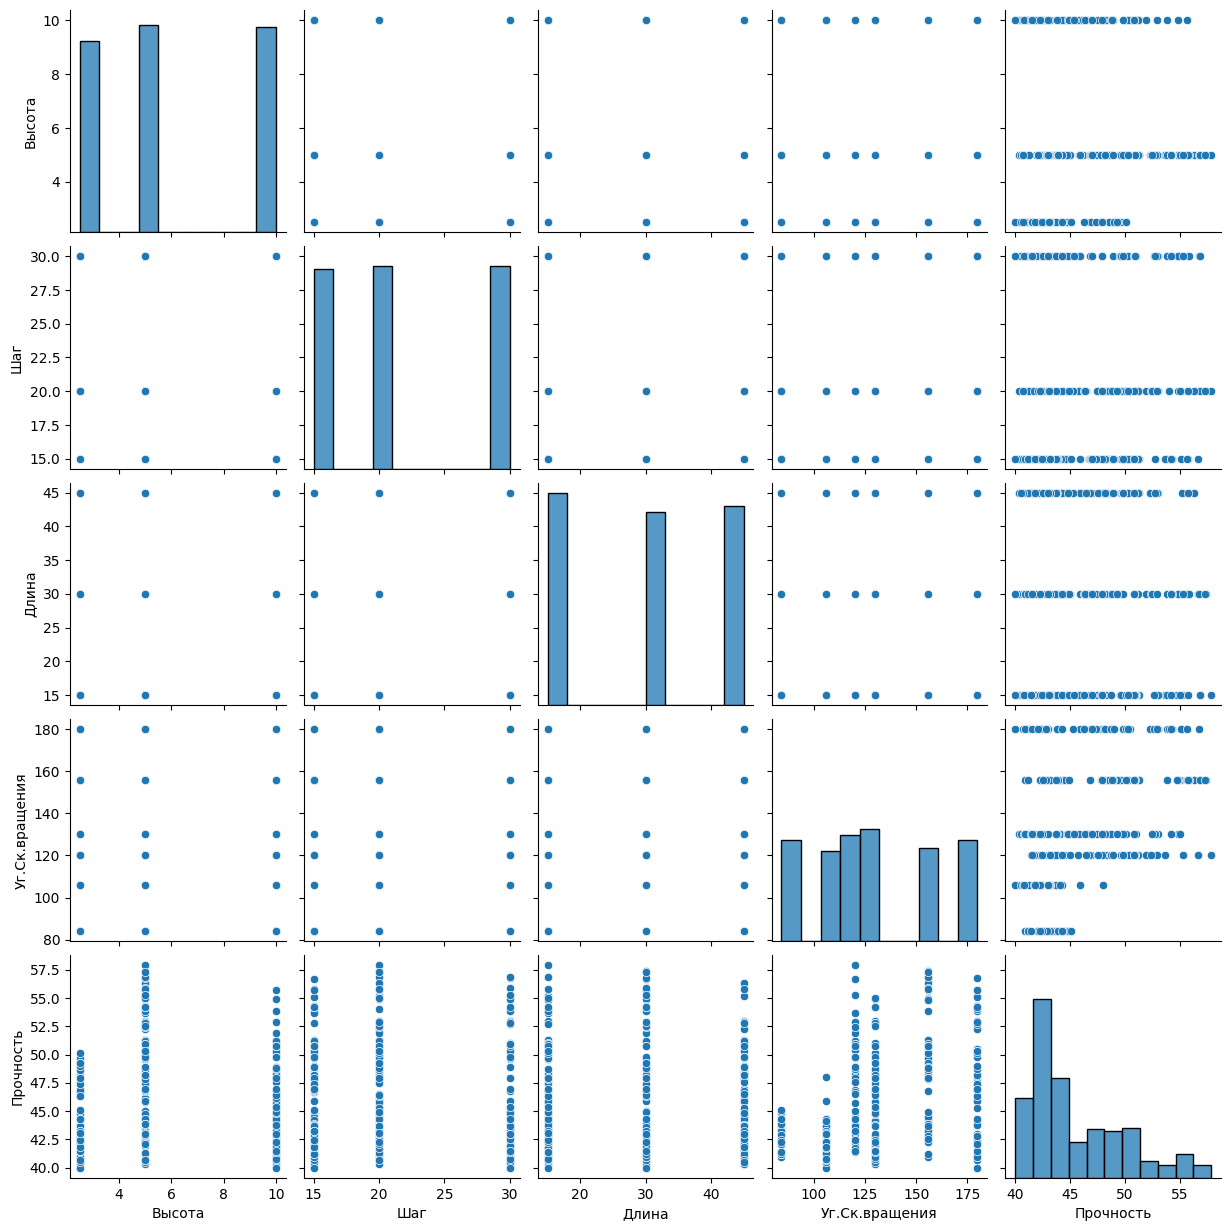

In [50]:
sns.pairplot(train)

In [115]:
enc = OrdinalEncoder()
X['Режим'] = enc.fit_transform(np.array(X['Режим']).reshape(-1,1))
X_test['Режим'] = enc.transform(np.array(X_test['Режим']).reshape(-1,1))

In [116]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

In [117]:
model = Pipeline([('poly',PolynomialFeatures(2)), ('scaler', StandardScaler()), ('pca', PCA(n_components = 0.90))
,('lr', LinearRegression())])
model.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures()), ('scaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)), ('lr', LinearRegression())])

In [118]:
val_pred = model.predict(X_val)

In [126]:
mae(val_pred, y_val)

3.1325072313650524

In [127]:
model.fit(X, y)
pred = model.predict(X_test)

In [128]:
predict = pd.DataFrame()
predict['id'] = [x for x in range(len(X_test))]
predict['pred'] = pred

**Этот файл загружаете на кагл**

In [129]:
predict.to_csv('my_pred.csv', index = False)